# Лабораторна робота 4
### Студента групи МІТ-31 (підгрупа 1)
### Дриги Михайла Сергійовича

## Завдання
1. Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).
2. Згенерувати набір даних для регресії та класифікації з використанням TensorFlow
3. Здійснити графічний аналіз наборів даних за допомогою Matplotlib
4. Відповіді оформити .ipynb документом
5. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import tensorflow as tf

## Завдання 1

In [2]:
tf1 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(tf1)
print(np.square(tf1))
tf1 = tf1 + 100
print(tf1)
tf1_new = tf.gather(tf1, [1])
print(tf1_new)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
tf.Tensor(
[[101 102 103]
 [104 105 106]
 [107 108 109]], shape=(3, 3), dtype=int32)
tf.Tensor([[104 105 106]], shape=(1, 3), dtype=int32)


In [3]:
scalar = tf.constant(9)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [4]:
scalar.ndim

0

In [5]:
vector = tf.constant([18, 12, 15])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([18, 12, 15])>

In [6]:
vector.ndim

1

In [7]:
mat1 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>

In [8]:
mat1.ndim

2

In [9]:
mat2 = tf.constant([[1., 2., 3.],
                    [4., 5., 6.],
                    [7., 8., 9.]], dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float16)>

In [10]:
mat2.ndim

2

In [11]:
tensor = tf.constant([[[1, 2, 3,],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [12]:
tensor.ndim

3

In [13]:
rnd1 = tf.random.Generator.from_seed(70)
rnd1 = rnd1.normal(shape=(40, 20))
rnd2 = tf.random.Generator.from_seed(10)
rnd2 = rnd2.normal(shape=(50, 30))

In [14]:
df2 = pd.DataFrame(np.random.randint(0, 10, (8, 8)), columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"])
print(df2)
print(df2.describe(include='all'))

   x1  x2  x3  x4  x5  x6  x7  x8
0   7   8   0   2   9   8   4   6
1   7   6   3   7   2   6   2   7
2   3   1   3   8   0   8   0   3
3   8   2   4   9   4   9   2   5
4   3   3   8   3   2   7   2   5
5   5   0   7   4   5   5   5   4
6   6   5   0   3   6   3   1   1
7   5   9   2   5   6   2   5   1
            x1        x2        x3        x4        x5        x6        x7  \
count  8.00000  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000   
mean   5.50000  4.250000  3.375000  5.125000  4.250000  6.000000  2.625000   
std    1.85164  3.284161  2.924649  2.587746  2.866058  2.507133  1.846812   
min    3.00000  0.000000  0.000000  2.000000  0.000000  2.000000  0.000000   
25%    4.50000  1.750000  1.500000  3.000000  2.000000  4.500000  1.750000   
50%    5.50000  4.000000  3.000000  4.500000  4.500000  6.500000  2.000000   
75%    7.00000  6.500000  4.750000  7.250000  6.000000  8.000000  4.250000   
max    8.00000  9.000000  8.000000  9.000000  9.000000  9.000000  5.00

In [15]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'feature1': np.random.rand(10),
        'feature2': np.random.rand(10),
        'feature3': np.random.rand(10),
        'target': np.random.randint(0, 5, 10)
    }
)
features = ['feature1', 'feature2', 'feature3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

   feature1  feature2  feature3  target
0  0.623089  0.102139  0.339962       4
1  0.139001  0.688161  0.475922       4
2  0.094177  0.768642  0.815292       3
3  0.101140  0.300277  0.709210       4
4  0.299023  0.759018  0.384561       2
5  0.694766  0.039271  0.685381       4
6  0.156015  0.864218  0.544143       4
7  0.599717  0.158236  0.590926       3
8  0.727299  0.129421  0.363813       0
9  0.932317  0.719258  0.606815       1
features:[0.62308913 0.10213922 0.33996198] target:4
features:[0.13900125 0.6881614  0.47592226] target:4
features:[0.09417676 0.76864165 0.8152916 ] target:3
features:[0.1011395  0.30027735 0.70920974] target:4
features:[0.29902333 0.7590178  0.3845608 ] target:2
features:[0.6947663  0.03927094 0.6853805 ] target:4
features:[0.15601538 0.8642182  0.5441435 ] target:4
features:[0.5997166  0.15823646 0.59092647] target:3
features:[0.7272991  0.1294212  0.36381328] target:0
features:[0.932317  0.7192584 0.6068146] target:1


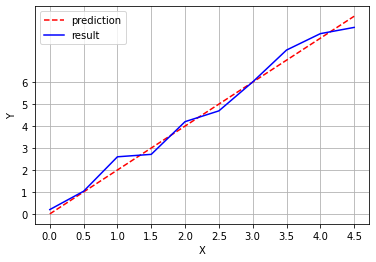

In [16]:
x = np.arange(0, 5, 0.5)
y1 = x * 2

adder = np.random.random(len(x)) * 1.5 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y1, "r--", label="prediction")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [17]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.281226263532358
0.11324882229235896


In [18]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('data.csv', 'w') as f:
    f.write(df.to_csv(index=False))

     X         Y  Y_hat
0  0.0  0.196992    0.0
1  0.5  1.032074    1.0
2  1.0  2.600798    2.0
3  1.5  2.711902    3.0
4  2.0  4.200925    4.0
5  2.5  4.691550    5.0
6  3.0  6.008916    6.0
7  3.5  7.459924    7.0
8  4.0  8.207736    8.0
9  4.5  8.491651    9.0


In [19]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 330ms/step - loss: 3.2174 - mae: 3.2174
Epoch 2/80
1/1 [==============================] - 0s 2ms/step - loss: 3.1595 - mae: 3.1595
Epoch 3/80
1/1 [==============================] - 0s 2ms/step - loss: 3.1025 - mae: 3.1025
Epoch 4/80
1/1 [==============================] - 0s 3ms/step - loss: 3.0455 - mae: 3.0455
Epoch 5/80
1/1 [==============================] - 0s 2ms/step - loss: 2.9885 - mae: 2.9885
Epoch 6/80
1/1 [==============================] - 0s 3ms/step - loss: 2.9314 - mae: 2.9314
Epoch 7/80
1/1 [==============================] - 0s 2ms/step - loss: 2.8744 - mae: 2.8744
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 2.8174 - mae: 2.8174
Epoch 9/80
1/1 [==============================] - 0s 2ms/step - loss: 2.7604 - mae: 2.7604
Epoch 10/80
1/1 [==============================] - 0s 3ms/step - loss: 2.7033 - mae: 2.7033
Epoch 11/80
1/1 [==============================] - 0s 5ms/step - loss: 2.6463 - mae: 2.

In [20]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(10, 0)

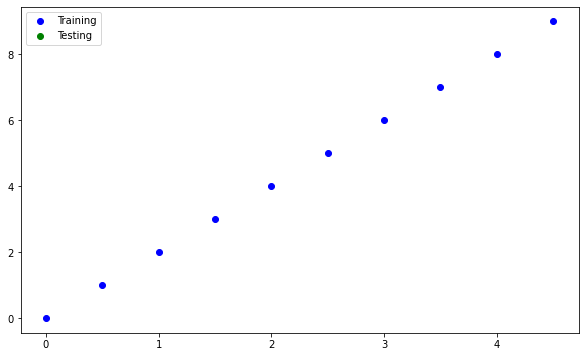

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [24]:
model.predict([20.0])

array([[39.942238]], dtype=float32)

In [25]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=20, verbose=0)

In [27]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [28]:
tf.random.set_seed(42)

X_regression = np.arange(0, 100, 5)
y_regression = np.arange(100, 110, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [29]:
model_1.evaluate(x, y1)

1/1 [==============================] - 0s 129ms/step - loss: -53.5553 - accuracy: 0.2000


[-53.5552864074707, 0.20000000298023224]

In [30]:
len(x)

10

In [31]:
X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

((10,), (0,))

In [32]:

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

C:\Users\Mkarlos\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
1/1 [==============================] - 0s 376ms/step - loss: 3.6568 - accuracy: 0.1000
Epoch 2/25
1/1 [==============================] - 0s 3ms/step - loss: 3.3166 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 2ms/step - loss: 2.9870 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 3ms/step - loss: 2.6683 - accuracy: 0.1000
Epoch 5/25
1/1 [==============================] - 0s 2ms/step - loss: 2.3606 - accuracy: 0.1000
Epoch 6/25
1/1 [==============================] - 0s 4ms/step - loss: 2.0638 - accuracy: 0.1000
Epoch 7/25
1/1 [==============================] - 0s 2ms/step - loss: 1.7780 - accuracy: 0.1000
Epoch 8/25
1/1 [==============================] - 0s 3ms/step - loss: 1.5038 - accuracy: 0.1000
Epoch 9/25
1/1 [==============================] - 0s 2ms/step - loss: 1.2406 - accuracy: 0.1000
Epoch 10/25
1/1 [==============================] - 0s 2ms/step - loss: 0.9881 - accuracy: 0.1000
Epoch 11/25
1/1 [============

In [33]:
pd.DataFrame(history.history)

,loss,accuracy
0,3.656841,0.1
1,3.316552,0.0
2,2.987022,0.0
3,2.668347,0.1
4,2.360600,0.1
5,2.063806,0.1
6,1.777956,0.1
7,1.503834,0.1
8,1.240631,0.1
9,0.988077,0.1


Text(0.5, 1.0, 'training_2 ')

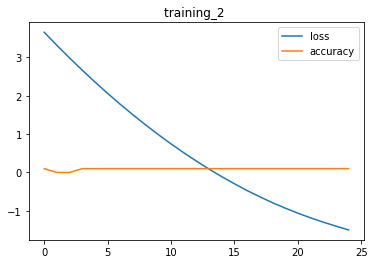

In [34]:
pd.DataFrame(history.history).plot()
plt.title("training_2 ")

In [35]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 195ms/step - loss: 3.2174 - mae: 3.2174
Epoch 2/80
1/1 [==============================] - 0s 2ms/step - loss: 3.1595 - mae: 3.1595
Epoch 3/80
1/1 [==============================] - 0s 1ms/step - loss: 3.1025 - mae: 3.1025
Epoch 4/80
1/1 [==============================] - 0s 2ms/step - loss: 3.0455 - mae: 3.0455
Epoch 5/80
1/1 [==============================] - 0s 3ms/step - loss: 2.9885 - mae: 2.9885
Epoch 6/80
1/1 [==============================] - 0s 2ms/step - loss: 2.9314 - mae: 2.9314
Epoch 7/80
1/1 [==============================] - 0s 1ms/step - loss: 2.8744 - mae: 2.8744
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 2.8174 - mae: 2.8174
Epoch 9/80
1/1 [==============================] - 0s 2ms/step - loss: 2.7604 - mae: 2.7604
Epoch 10/80
1/1 [==============================] - 0s 6ms/step - loss: 2.7033 - mae: 2.7033
Epoch 11/80
1/1 [==============================] - 0s 5ms/step - loss: 2.6463 - mae: 2.

In [36]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(10, 0)

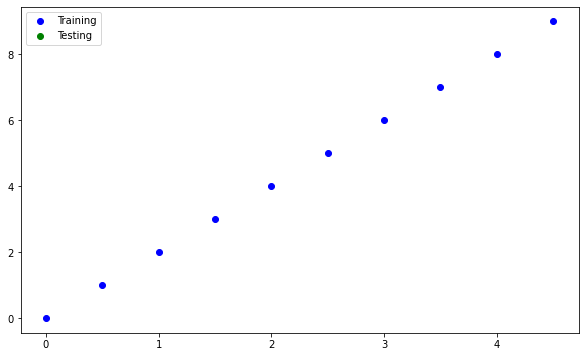

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [40]:
model.predict([20.0])

array([[39.942238]], dtype=float32)